<a href="https://colab.research.google.com/github/arthurweslen/Databricks/blob/main/DAX/Indicador%2080_20%20(Pareto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Indicador 80/20 (*Pareto*)**

O indicador 80/20 (Princípio de Pareto) é uma forma de analisar dados para descobrir quais poucos itens são responsáveis pela maior parte do resultado.

Ele é muito usado no FP&A, BI, gestão financeira, produtividade, vendas e praticamente qualquer área que precise priorizar análises.

📌 O que é o Indicador 80/20?

É a aplicação prática do Princípio de Pareto, que diz que:

80% dos efeitos vêm de 20% das causas.

No exemplo abaixo, vamos mostrar quais são as categorias e produtos que tem mais despesas/gastos



1) Faça uma medida simples de soma de despesas

`Total Despesas = SUM(f_Despesas[Valor da Despesa])`

2) Vamos criar a medida Pareto :


Criando uma variável com Total Acumulado, usando:
Calculate
Medida criada do total
WINDOWS (de acordo com exemplo abaixo)
ORDER BY

Depois criando uma medida com o total, para repitindo o valor total para todos

Por fim, realizando a divisão das variáveis

In [ ]:
Pareto Categoria =

VAR Total_Acumulado =
CALCULATE(
    [Total Despesas],
    WINDOW(
        1,ABS, //# Primeiro elemento da Tabela
        0,REL, //# Linha do contexto
        ALLSELECTED(f_Despesas[Categoria]),
        ORDERBY([Total Despesas], DESC)
    )
)

VAR Total_Categoria =
CALCULATE(
    [Total Despesas],
    ALLSELECTED(f_Despesas[Categoria]))

VAR Resultado = DIVIDE(Total_Acumulado,Total_Categoria,0)

RETURN Resultado

Para criar o Pareto do Produto, é só apenas copiar e colar a medida anterior e inserir a coluna produto

In [ ]:

Pareto Produto =

VAR Total_Acumulado =
CALCULATE(
    [Total Despesas],
    WINDOW(
        1,ABS, //# Primeiro elemento da Tabela
        0,REL, //# Linha do contexto
        ALLSELECTED(f_Despesas[Produto]),
        ORDERBY([Total Despesas], DESC)
    )
)

VAR Total_Produto =
CALCULATE(
    [Total Despesas],
    ALLSELECTED(f_Despesas[Produto]))

VAR Resultado = DIVIDE(Total_Acumulado,Total_Produto,0)

RETURN Resultado

Para colocar em uma matriz onde tem as linhas
 - Categoria
 - Produto

 Será necessário criar uma outra medida para interpretar, então utilizaremos o IF e o ISINSCOPE

In [ ]:
Pareto Categoria/Produto =
IF(
    ISINSCOPE(f_Despesas[Produto]) = FALSE,
   [Pareto Categoria],[Pareto Produto]
    )

# Agora vamos criar o **indicador 80/20**
Agora vamos criar o indicador, apenas usando uma condição <= 0.8 (80%)

In [ ]:
Indicar 80/20 =

VAR Categoria = IF([Pareto Categoria] <= 0.8,"20% das Maiores Despesas","-")
VAR Produto = IF([Pareto Produto] <= 0.8,"20% das Maiores Despesas","-")

VAR Resultado =
 IF(
    ISINSCOPE(f_Despesas[Produto]) =FALSE,
    Categoria,
    Produto)

RETURN Resultado


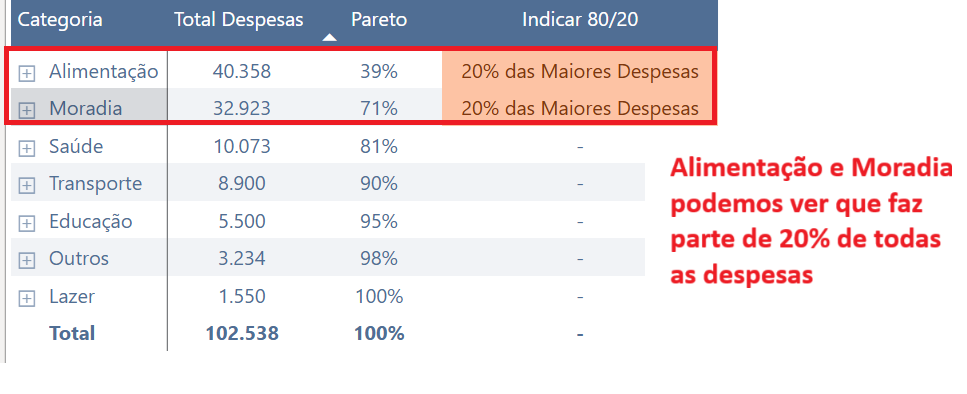

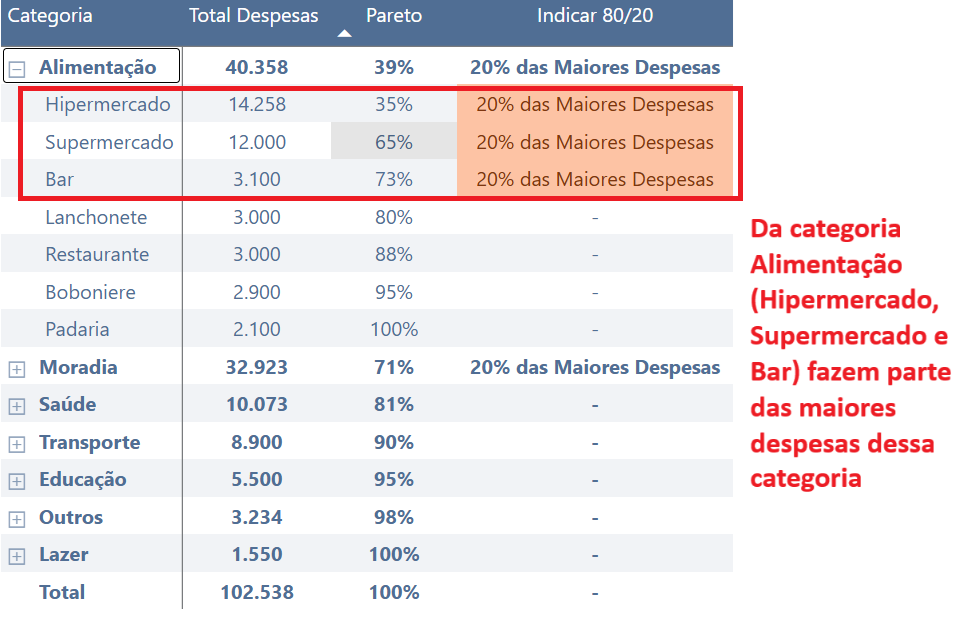